### ensemble
- 여러개의 분류 모델을 조합해서 더 나은 성능을 내는 방법

In [29]:
# RandomForest : 의사결정나무를 단일 모델 조합해서 예측을 실행하는 모델
from sklearn import datasets
import numpy as np
np.random.seed(5)

In [30]:
# 손글씨 데이터
mnist = datasets.load_digits()
feature , labels = mnist.data , mnist.target
mnist.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
# 의사결정나무를 이용한 10번의 교차 검증 10번 실시 -> 정확도를 보기 위해서
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv_scores = []
cv = DecisionTreeClassifier()

for i in range(10):
    score = cross_val_score(
        cv,
        feature,
        labels,
        cv=10,
        scoring='accuracy'
    )

    cv_scores.append(score.mean())

cv_scores

[0.8280229671011794,
 0.8235630043451273,
 0.8224674115456239,
 0.8235692116697703,
 0.8341464928615766,
 0.8185692116697704,
 0.8241247672253259,
 0.8180136561142148,
 0.8235630043451272,
 0.8258038485412786]

In [32]:
# 랜덤포레스트를 이용한 10번의 교차 검증 10번 실시 -> 정확도를 보기 위해서
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_scores = []
rf = RandomForestClassifier()

for i in range(10):
    score = cross_val_score(
        rf,
        feature,
        labels,
        cv=10,
        scoring='accuracy'
    )

    rf_scores.append(score.mean())

rf_scores

[0.9526939788950962,
 0.9487957790192427,
 0.9510211049037863,
 0.9549286157666046,
 0.9471322160148976,
 0.9487988826815641,
 0.952122905027933,
 0.9454531346989447,
 0.9460180012414648,
 0.9471322160148976]

In [33]:
def cross_validation(classifier, features, labels):
    cv_scores = []

    for i in range(10):
        score = cross_val_score(
            classifier,
            features,
            labels,
            cv=10,
            scoring='accuracy'
        )

        cv_scores.append(score.mean())

    return cv_scores

In [34]:
# 의사결정 나무 
dt_cv_scores = cross_validation(DecisionTreeClassifier(),feature,labels)
dt_cv_scores

[0.8330509000620733,
 0.8224736188702669,
 0.8268963376784605,
 0.8246710117939168,
 0.825788330229671,
 0.821880819366853,
 0.833584729981378,
 0.8280167597765363,
 0.826340782122905,
 0.8235816263190564]

In [35]:
# 랜덤 포레스트
rf_cv_scores = cross_validation(RandomForestClassifier(),feature,labels)
rf_cv_scores

[0.9504655493482307,
 0.9410117939168219,
 0.9510211049037863,
 0.9549162011173185,
 0.9504469273743016,
 0.9449130974549969,
 0.9510117939168218,
 0.9493513345747981,
 0.9488081936685286,
 0.9471198013656114]

### RandomForest와 의사결정나무의 정확도의 시각화

In [36]:
import matplotlib.pyplot as plt

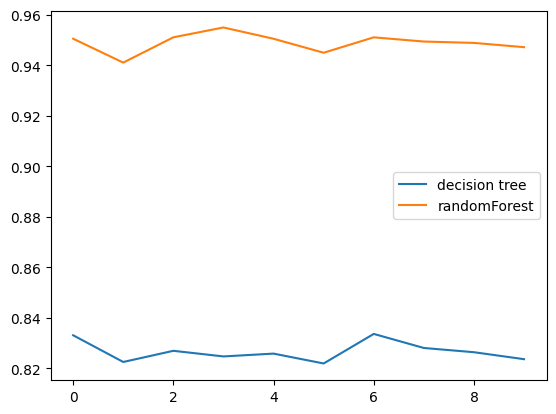

In [37]:
plt.plot(
    dt_cv_scores,
    label='decision tree'
)

plt.plot(
    rf_cv_scores,
    label = 'randomForest'
)

plt.legend()

plt.show()

### 보팅(Voting) 앙상블
: 단일 모델을 앙상블하여 더 나은 예측을 하는 모델 생성

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train , X_test , y_train , y_test = \
    train_test_split(feature, labels, stratify=labels, test_size=0.2)

### 1) 단일 모델 정확도 측정

In [40]:
# 의사 결정 나무
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test, y_test)

0.85

In [41]:
# knn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9861111111111112

In [42]:
# svm
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9722222222222222

### 2) 하드 보팅
: 각각의 분류기(머신 러닝 모델)의 예측값을 모아 가장 많은 득표를 받은 예측값으로 최종 결론을 내는 방식 <br><br>
(가장 높은 값을 쓴다.)

In [43]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('KNN',knn),('SVM',svm)],
    weights=[1,1,1],
    voting='hard'
).fit(X_train,y_train)

voting_clf.score(X_test,y_test)

0.9777777777777777

### 3) 소프트 보팅
: 각각의 분류모델을 활용하여 모든 분류값들의 확률들을 더해서 가장 높은 점수를 획득한 분류값으로 최종 결론을 내는 방식

In [44]:
voting_clf = VotingClassifier(
    estimators=[('decision_tree',dtree),('KNN',knn),('SVM',svm)],
    weights=[1,1,1],
    voting='soft'
).fit(X_train,y_train)

voting_clf.score(X_test,y_test)

0.975